In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('MoreTests.pickle', 'rb')
data = pickle.load(f)
f.close()

In [21]:
print(data['var'])
print()
for i in range(len(data['order'])):
    print(str(i) + ' ' + data['order'][i])
print()
#for key in data['data'][list(data['data'].keys())[0]].keys():
#    print(key)

{'aloneClusterSearch': ['false', 'true'], 'clusteringOn': ['false', 'true'], 'localRecluster': [0, 1], 'reclusterPeriod': [150, 300], 'aloneThreshold': [0.05, 0.1, 0.225], 'aloneOrClusterRatio': ['false', 'true'], 'globalRecluster': [0, 1, 3, 4]}

0 reclusterPeriod
1 aloneOrClusterRatio
2 localRecluster
3 clusteringOn
4 aloneClusterSearch
5 aloneThreshold
6 globalRecluster



In [22]:
inputDict = {'globalRecluster':'GR', 'reclusterThreshold': 'GR Thresh', 'clusteringOn':'Cluster', 'localRecluster':'LR',
             'clusterSearchThresh':'CS', 'CHBatteryDropThresh':'Battery Thresh', 'CHTimeThresh':'Time Thresh'}

In [23]:
i = 0
print(len(data['data'].keys()))

15


In [24]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            for ignoreKey in ignoreDict[ind]:
                if key[ind] == ignoreKey:
                    ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run[compare]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [25]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = ''
            for i in range(currentLevel-separationLevel):
                if titleArr[i] in inputDict:
                    label += inputDict[titleArr[i]] + ': ' + strArr[i] + '  '
                else:
                    label += titleArr[i] + ': ' + strArr[i] + '  '
            #label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            #legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = '-'.join(titleArr) + ': '
        title += '-'.join(strArr)
        plt.xlabel('Time')
        plt.ylabel(stats['compare'])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY)

In [26]:
def generateAllGraphs(keyInds, ignoreDict={}, separationLevel=0, topY=0):
    for key in data['data'][list(data['data'].keys())[0]].keys():
        if type(data['data'][list(data['data'].keys())[0]][key]) is list:
            dat = compareOverTime(key, keyInds, ignoreDict)
            generateOverTimeGraphs(dat, separationLevel, topY)

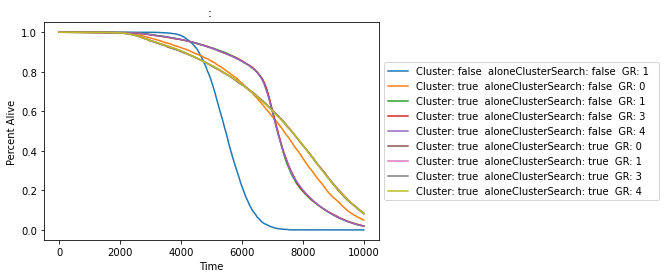

In [30]:
Alive = compareOverTime('Percent Alive', [3,4,6], {})
generateOverTimeGraphs(Alive, 0)

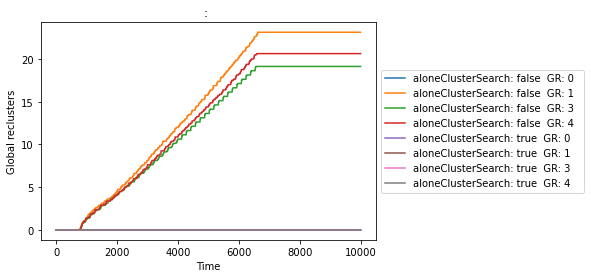

In [33]:
Alive = compareOverTime('Global reclusters', [4,6], {3:['false']})
generateOverTimeGraphs(Alive, 0)

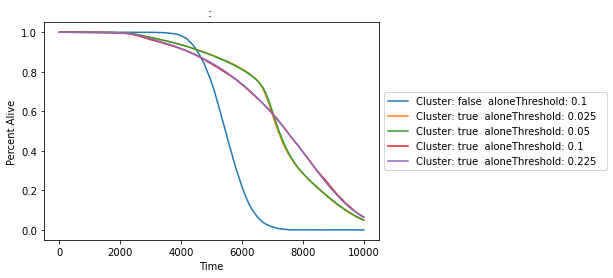

In [19]:
Alive = compareOverTime('Percent Alive', [4,9], {})
generateOverTimeGraphs(Alive, 0)

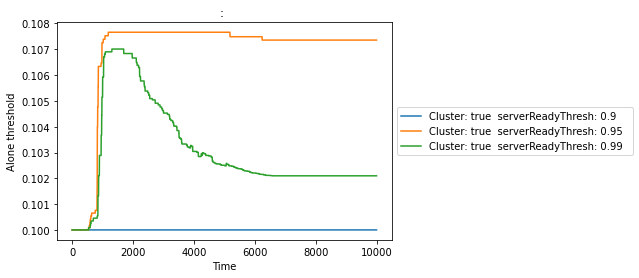

In [17]:
Alive = compareOverTime('Alone threshold', [4,7], {4:['false']})
generateOverTimeGraphs(Alive, 0)

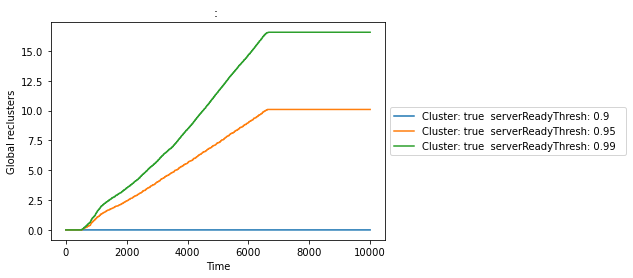

In [18]:
Alive = compareOverTime('Global reclusters', [4,7], {4:['false']})
generateOverTimeGraphs(Alive, 0)

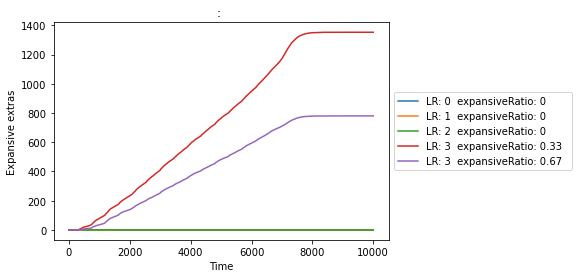

In [19]:
EE = compareOverTime('Expansive extras', [7,9], {2:['false']})
generateOverTimeGraphs(EE, 0)

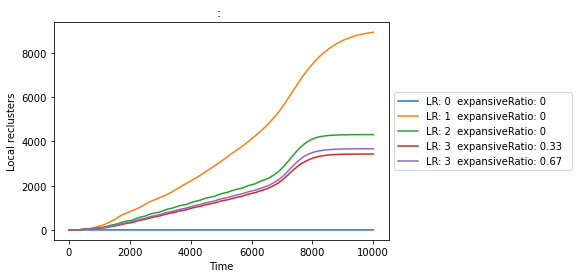

In [21]:
LR = compareOverTime('Local reclusters', [7,9], {2:['false']})
generateOverTimeGraphs(LR, 0)

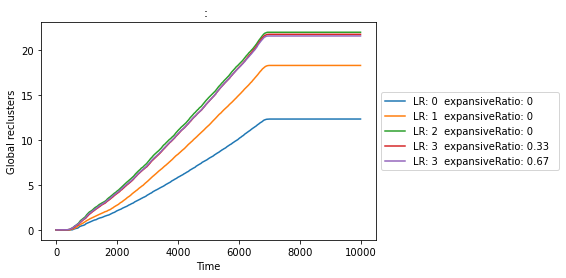

In [22]:
GR = compareOverTime('Global reclusters', [7,9], {2:['false']})
generateOverTimeGraphs(GR, 0)

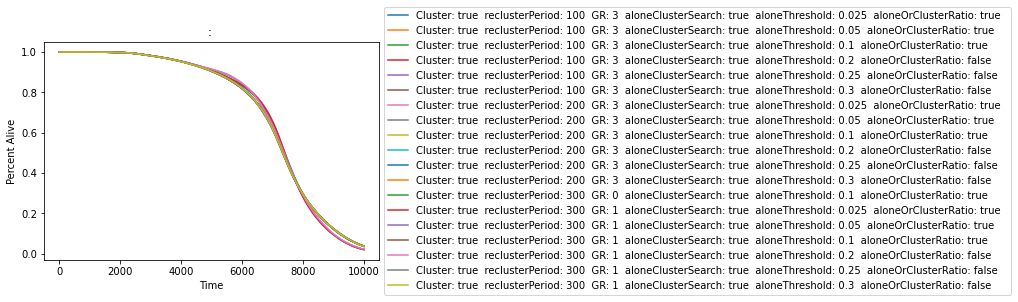

In [30]:
Alive = compareOverTime('Percent Alive', [2,3,4,5,6,8], {7:[3], 5:['false']})
generateOverTimeGraphs(Alive, 0)

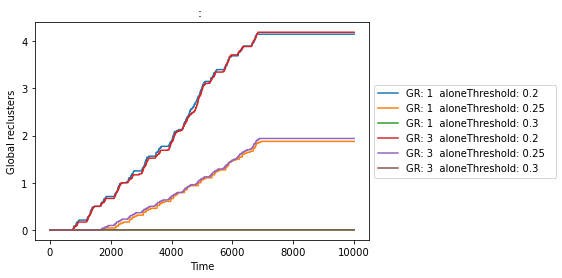

In [83]:
Alive = compareOverTime('Global reclusters', [0,7], {8:[3], 4:['false'], 9:['true'], 2:['false']})
generateOverTimeGraphs(Alive, 0)

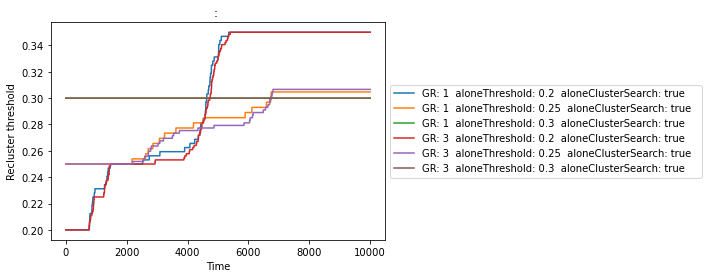

In [51]:
Alive = compareOverTime('Recluster threshold', [0,7,2], {8:[3], 4:['false'], 9:['true'], 2:['false']})
generateOverTimeGraphs(Alive, 0)

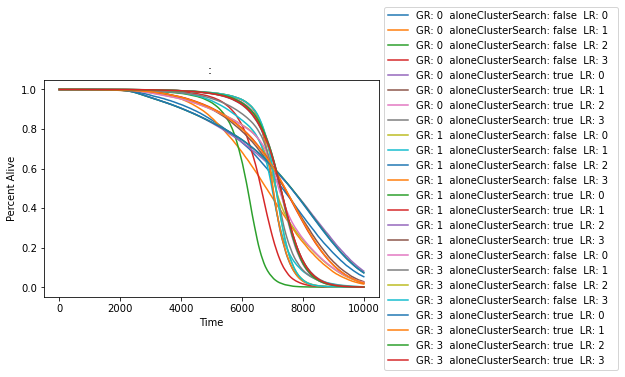

In [71]:
Alive = compareOverTime('Percent Alive', [0,2,8], {})
generateOverTimeGraphs(Alive, 0)

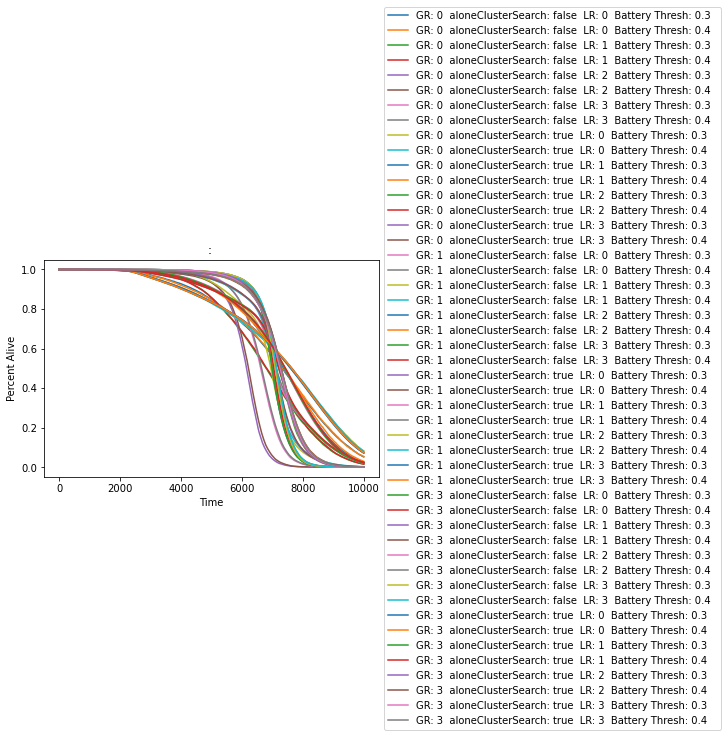

In [72]:
Alive = compareOverTime('Percent Alive', [0,2,8,6], {})
generateOverTimeGraphs(Alive, 0)

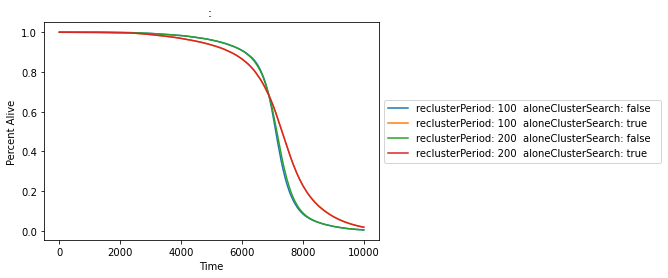

In [94]:
Alive = compareOverTime('Percent Alive', [1,2], {0:[0,1]})
generateOverTimeGraphs(Alive, 0)

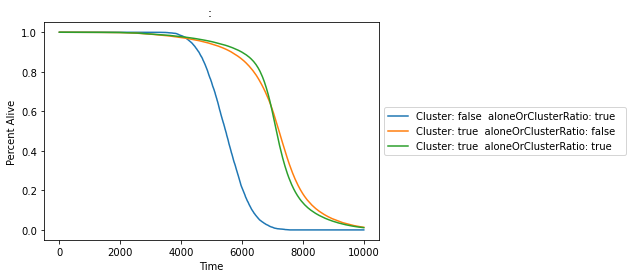

In [96]:
Alive = compareOverTime('Percent Alive', [4,9], {})
generateOverTimeGraphs(Alive, 0)

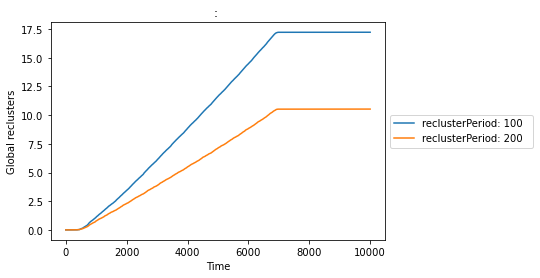

In [93]:
Alive = compareOverTime('Global reclusters', [1], {0:[0,1]})
generateOverTimeGraphs(Alive, 0)

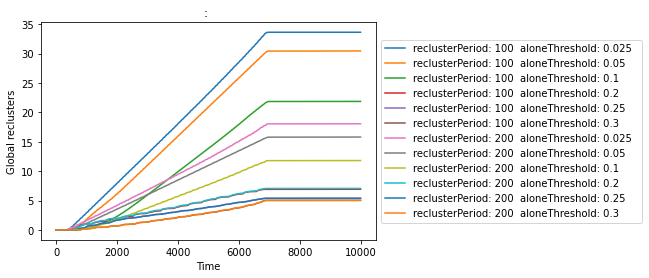

In [92]:
Alive = compareOverTime('Global reclusters', [1,7], {0:[0,1]})
generateOverTimeGraphs(Alive, 0)

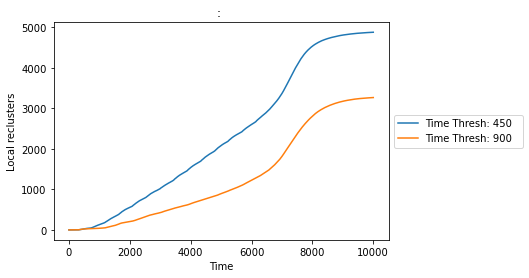

In [79]:
Alive = compareOverTime('Local reclusters', [3], {4:['false']})
generateOverTimeGraphs(Alive, 0)

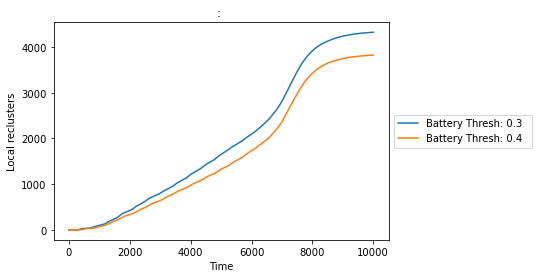

In [81]:
Alive = compareOverTime('Local reclusters', [6], {4:['false']})
generateOverTimeGraphs(Alive, 0)

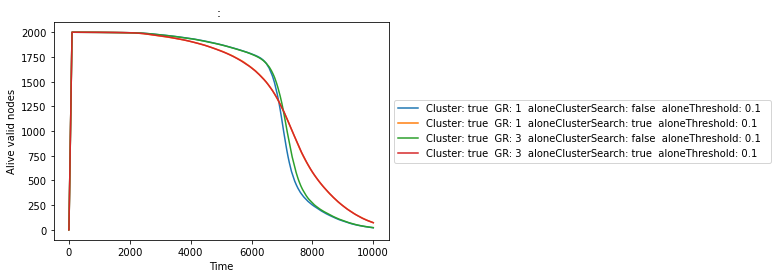

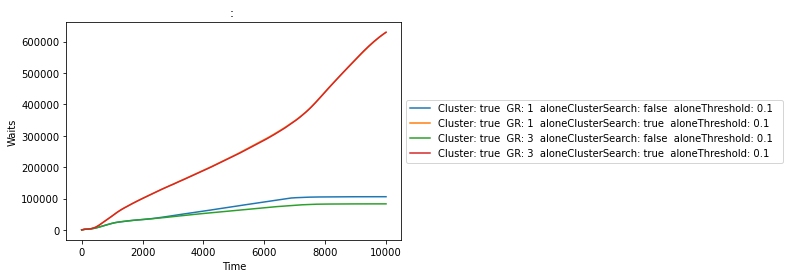

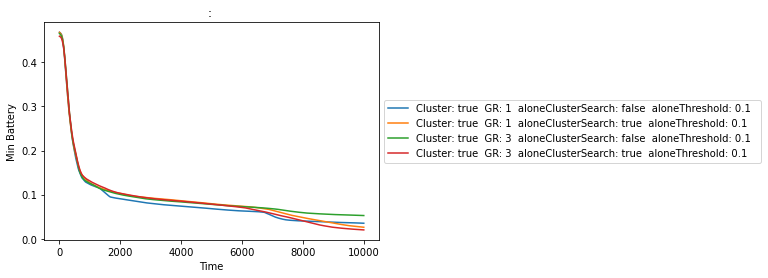

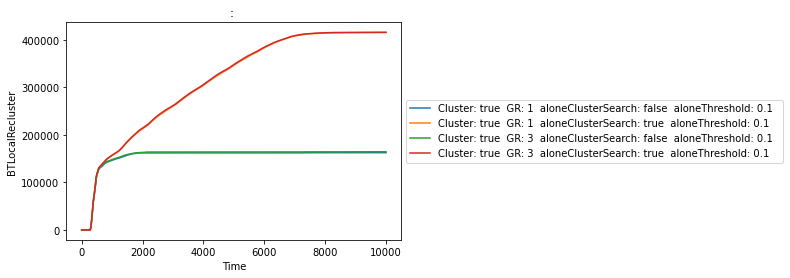

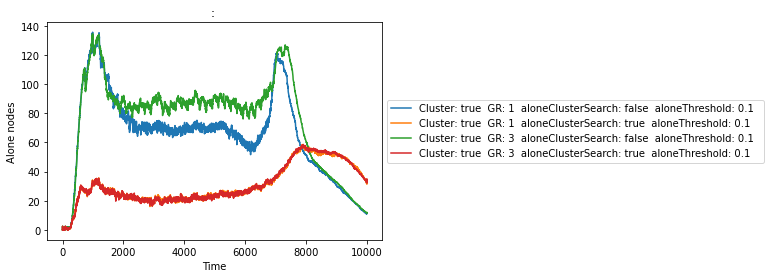

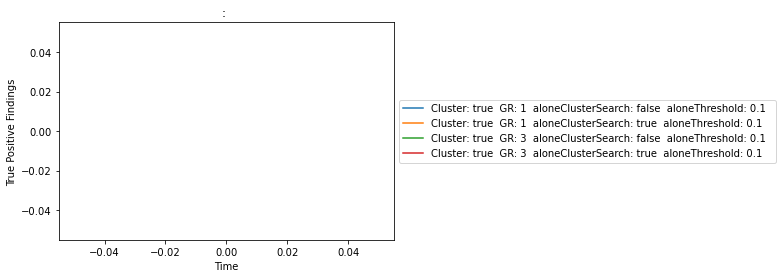

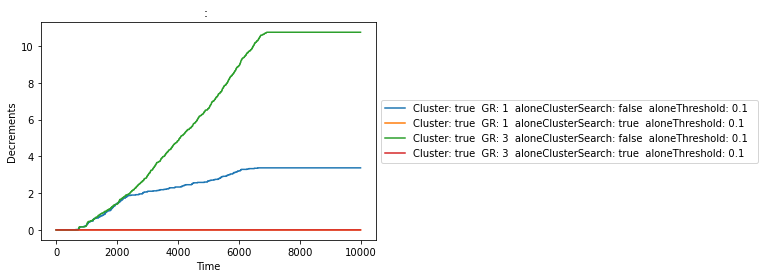

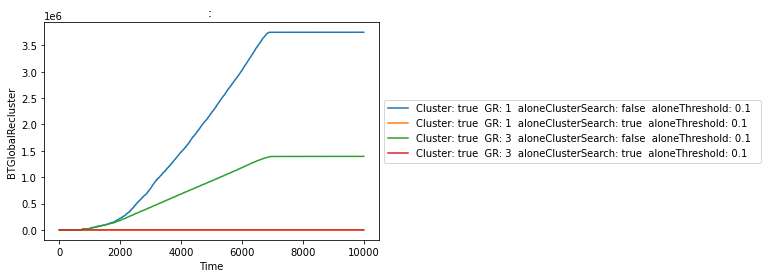

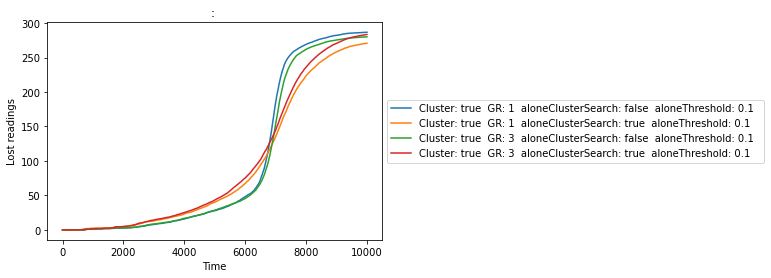

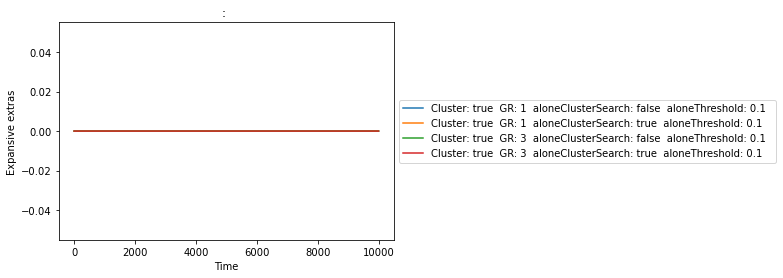

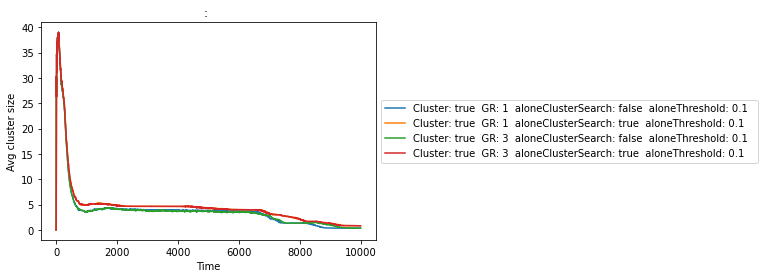

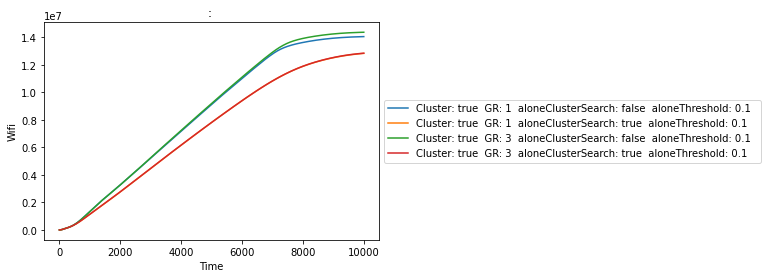

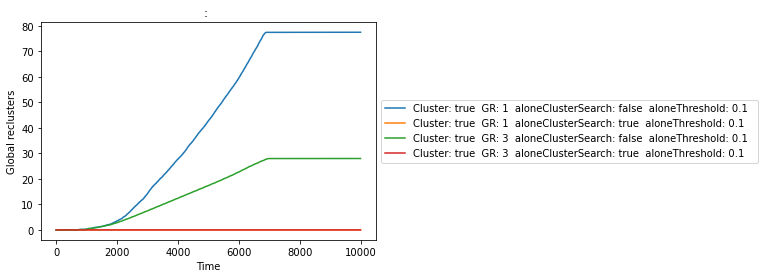

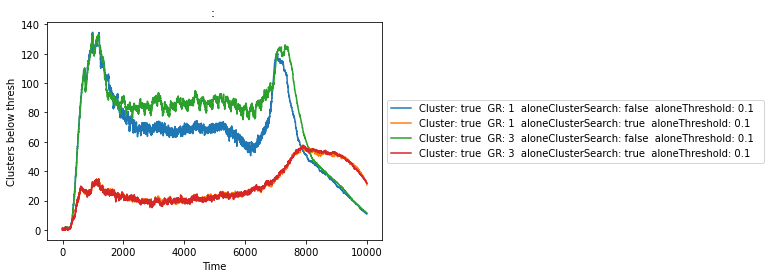

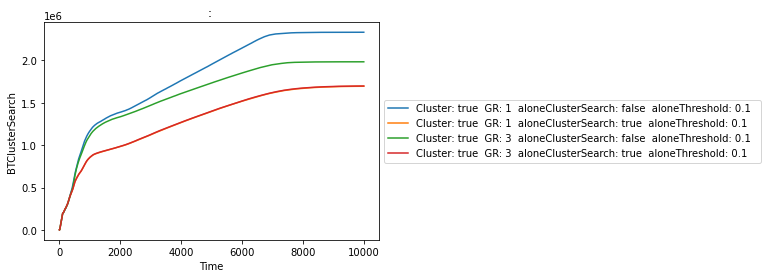

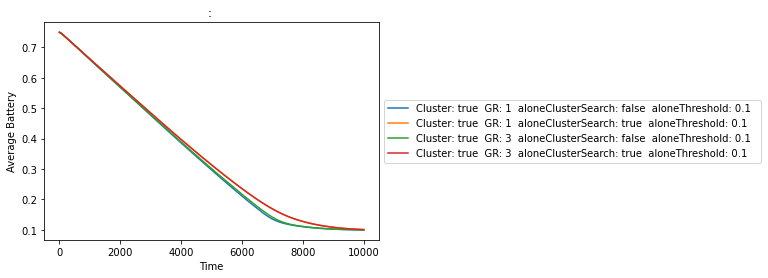

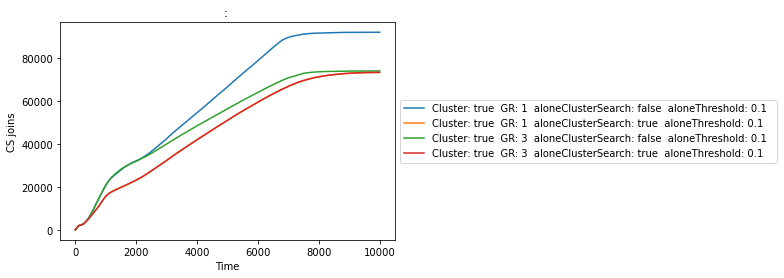

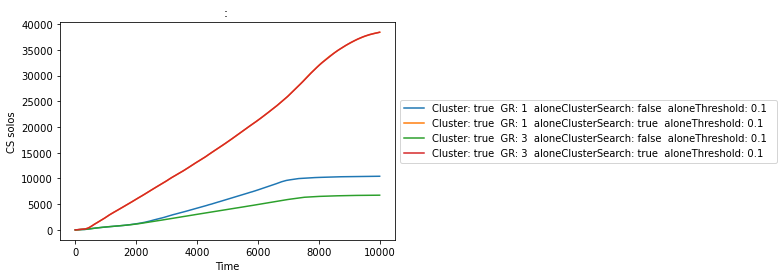

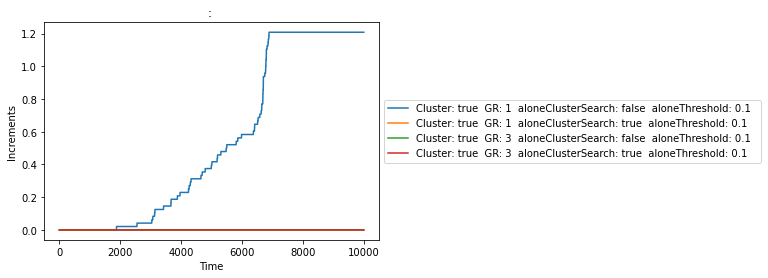

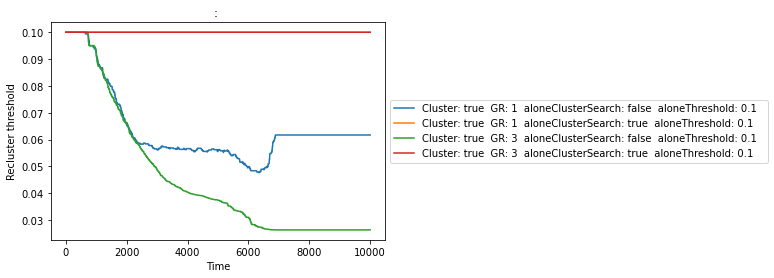

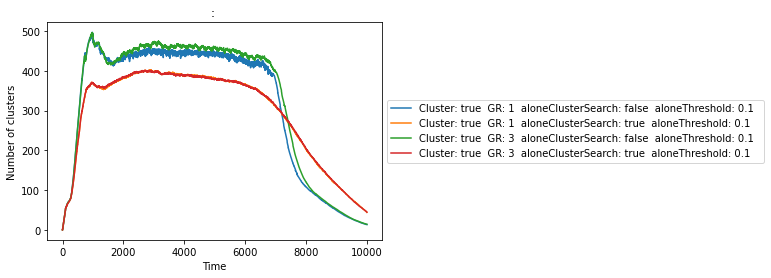

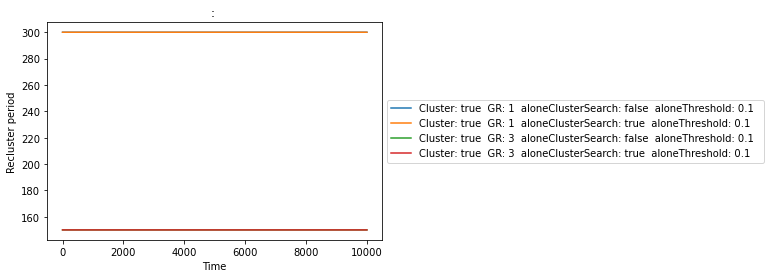

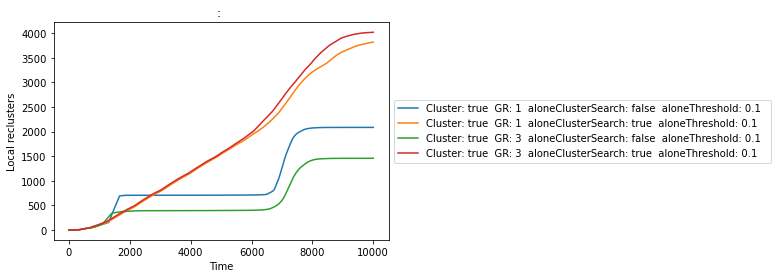

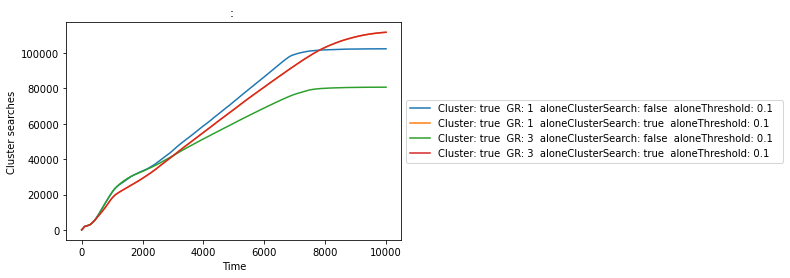

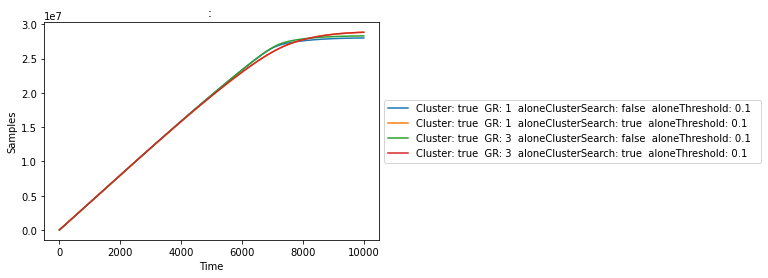

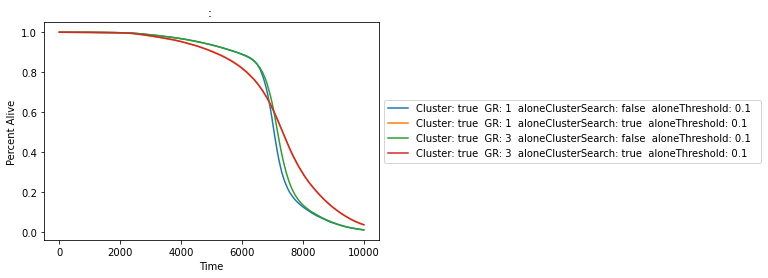

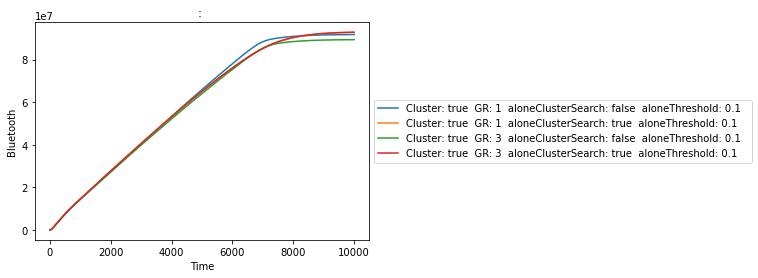

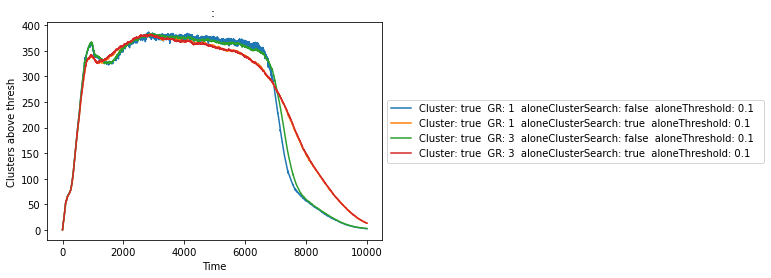

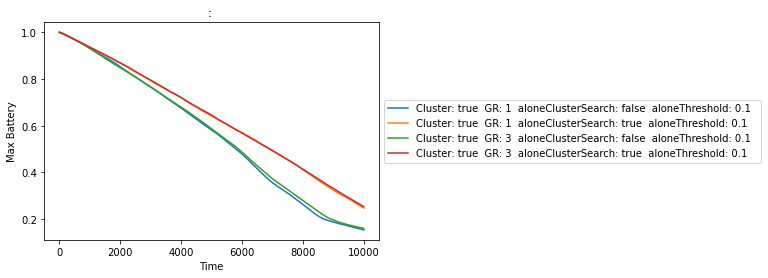

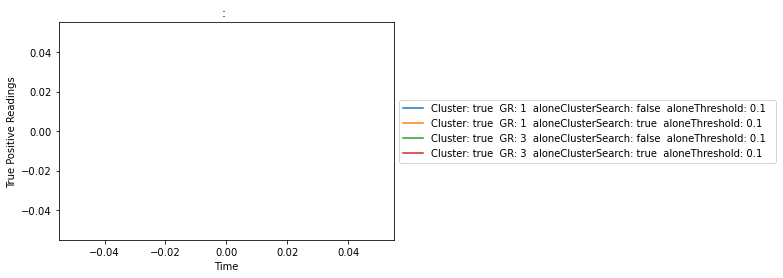

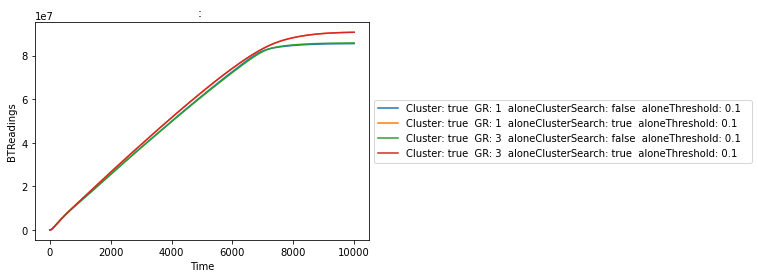

In [39]:
generateAllGraphs([4,0,2,7], {0:[0], 8:[3], 4:['false'], 9:['false'], 7:[0.025, 0.05]})